In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Import

In [3]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data['DESCR'][:830])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts


In [4]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])
y = data['target']

print("The target variable (y): {}".format(y))
print("-------------------")
print("")

print("The independent variables (X):")
X.head()


The target variable (y): [4.526 3.585 3.521 ... 0.923 0.847 0.894]
-------------------

The independent variables (X):


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Defining Functions 

In [11]:
# Generate Heatmap with ability to drop certain columns
#--------------------------------------------------------------------
def multicollinearity_check(data=X, target=y, remove=[], add_target=False, inplace=False ):
    """This function allows the easy visualisation of multicollinearity between variables
    input data is of the following format 'data' = X , target = y, remove """
    f, ax = plt.subplots(figsize=(12, 10)) 
    df = pd.DataFrame()

    if add_target == True:
        data["target"] = target

    if len(remove) != 0 and remove[0] != "":
        for item in remove:
            if item in list(data.columns):
                df[item] = data[item]
                
        data_dropped = data.drop(remove, axis=1)
    else:
        data_dropped = data
        
    corr_matrix = data_dropped.corr()
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True
    heatmap = sns.heatmap(round(corr_matrix,2), mask = mask, square = True,
                          linewidths = .5, cmap = "YlGnBu",
                          cbar_kws = {"shrink": .4, 
                                    "ticks" : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1, vmax = 1,annot = True,
                          annot_kws = {"size": 14, "color" : "black", "backgroundcolor": "white", "bbox": dict(facecolor='white', alpha=0.5)})
    #add the column names as labels
    
    Title_font = {
        'color':  'Black',
        'weight': 'normal',
        'size': 20,
        }
    if add_target != True:
        plt.title("Multicollinearity between Independent Variables\n", fontdict=Title_font)
    else:
        plt.title("Multicollinearity between Independent and Target Variables\n", fontdict=Title_font)
        
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    ax.xaxis.set_ticks_position("top")
    relation = dict()

    for column in list(corr_matrix.columns):
        for index in corr_matrix.index:
            value = corr_matrix[column][index]
            if (abs(value) > 0.7) and (abs(value) != 1) and (column != "target" or index != "target" ):
                if column not in relation.values(): 
                    relation.update({column:index})
    for key,value in relation.items():
        print("-------------------------------------------")
        print("Warning!! High collinearity found between variables {} and {}".format(key,value))
    
      
    if len(remove) == 1 and remove[0] != "target":
        fig = plt.figure(figsize=(12,4))
        p= sns.regplot(x=data[remove[0]],y=target)
    elif len(remove) >= 1 and remove[0] != "target":
        fig, axs = plt.subplots(len(remove),1,figsize=(12,8))
        for i,index in enumerate(remove):
            p= sns.regplot(x=data[index],y=target, ax=axs[i])
        
    print("-------------------------------------------")

    if inplace == True:
        if add_target == False:
            if "target" in list(data.columns):
                data.drop(["target"],axis=1,inplace=True)
        if len(remove) >0:
            for column in list(data.columns):
                if column in list(df.columns):
                    print(column)

                    data.drop(column,axis=1,inplace=True)
                    
    elif inplace == False:
        if add_target == True:
            if "target" in list(data.columns):
                data.drop(["target"],axis=1,inplace=True)
        for column in remove:
            if column not in data.columns:
                data[column] = df[column]     

    X= data
#--------------------------------------------------------------------


# View Oultiers in regplot and boxplot side-by-side choosing split
#--------------------------------------------------------------------
def view_outliers(data = X, target= y, split_size = 0.3):
    """This function returns a side-by-side view of outliers through a regplot 
    and a boxplot visualisationin of a dataframe'data' of independent variables
    as columns within that dataframe, other parameters include 'target' the 
    dependent variable and 'split_size' to adjust the number of plotted rows 
    as decimals between 0 and 1 or as integers"""
    
    if type(split_size)==float:
        if split_size%1 != 0:
            split_size = int(len(X)*split_size)
    elif type(split_size )== str :
        if split_size == "no":
            split_size =int(len(X))  
    fig, axs = plt.subplots(len(data.columns) - 2, 2,figsize=(30,40))  
    for index in list(range(0,len(data.columns)-2)):
        p= sns.regplot(x=data[list(data.columns)[index]][:split_size],y= target[:split_size], ax=axs[index][0])
#         axs[index][0].plot(p.get_lines()[0].get_xdata(),p.get_lines()[0].get_ydata(),c='green')
        
        sns.boxplot(data[list(data.columns)[index]][:split_size], ax= axs[index][1])

## Checking Multicollinearity

### multicollinearity_check(data=X, target=y, remove=[' ',' '], add_target=True)


The function above returns a heatmap of collinearity between independent variables as well as with the target variable.

**data** = independent variable df: X

**target** = dependent varibale list: y

**remove** = list of variables not to be included (default as empty list)

**add_target** = boolean of whether to view heatmap with target included (default as False)

**inplace** = manipulate your IV df to save the changes you made with remove/add_target

**In the case remove was passed a column name, a regplot of that column and the target is also presented to help view changes before proceeding**




-------------------------------------------
Warning!! High collinearity found between variables AveRooms and AveBedrms
-------------------------------------------


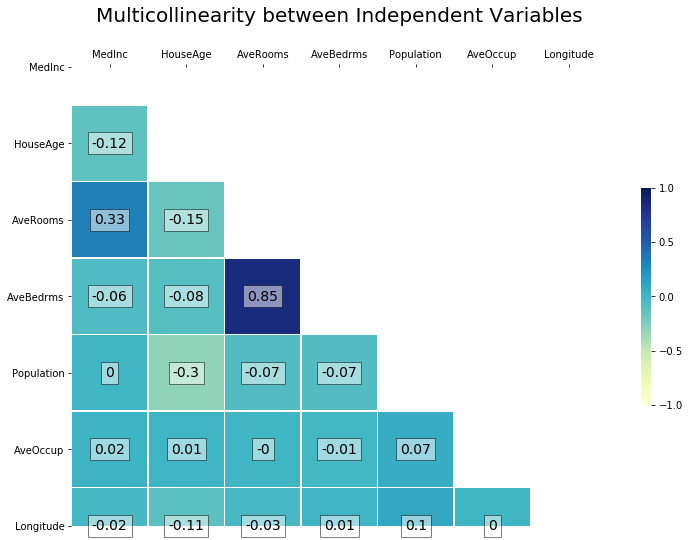

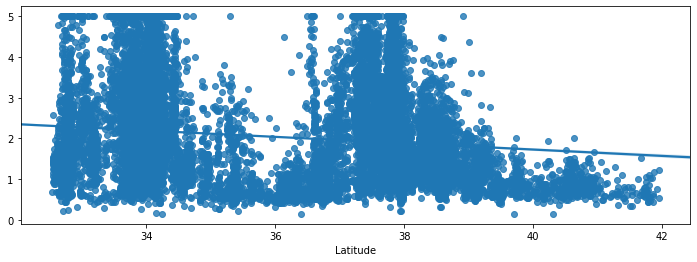

In [12]:
multicollinearity_check(data=X, target=y, remove=['Latitude'], add_target=False, inplace=False)
# multicollinearity_check()
# X

## Viewing Outliers
This function returns a side-by-side view of outliers through a regplot and a boxplot visualisation of a the input data and target values over a specified split size.

**data** = independent variable df: X

**target** = dependent varibale list: y

**split** = adjust the number of plotted rows as decimals between 0 and 1 or as integers

### view_outliers(data=X, target=y, split_size= 0.3 )


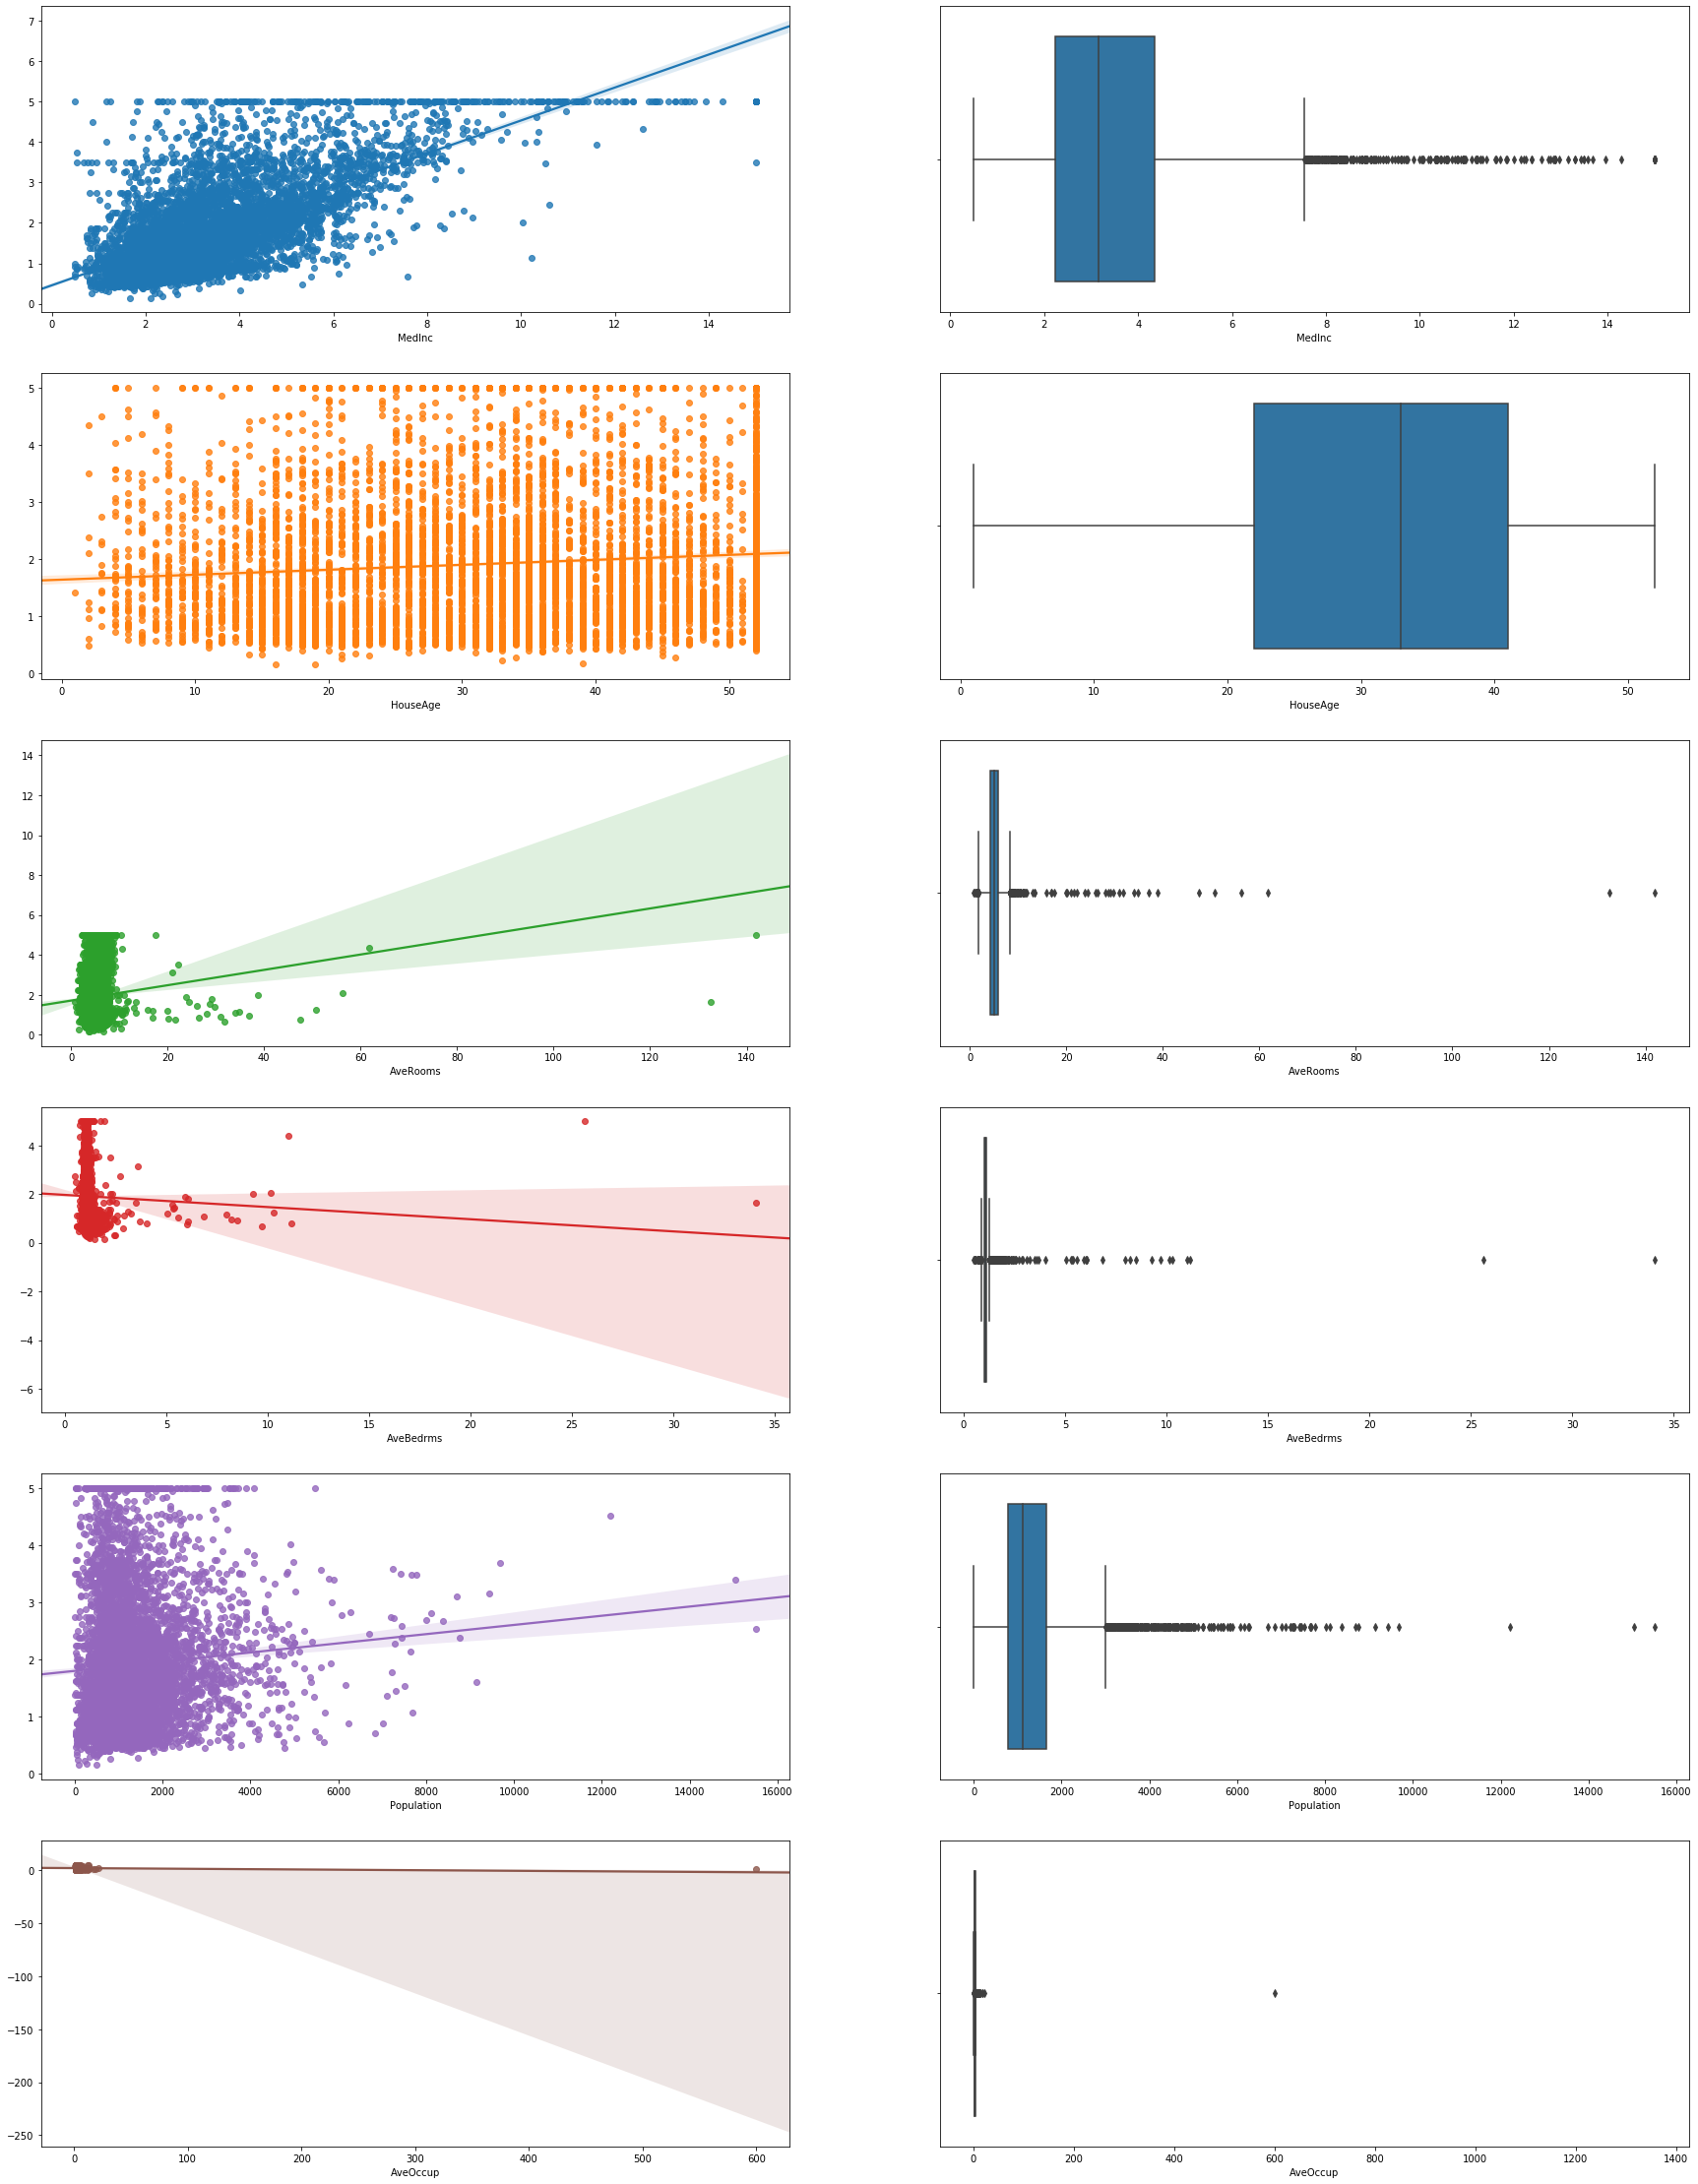

In [13]:
view_outliers(data=X, target=y, split_size=0.3)

***To do:**

-isolate the outliers

-run linear reg with visualisation plots
